<a href="https://colab.research.google.com/github/johnvb21/DeepLearning/blob/main/Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import sklearn
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist


In [ ]:
(train_data , train_labels), (test_data, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import random

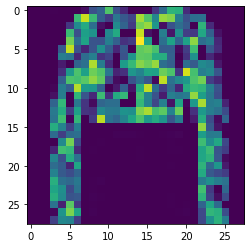

In [ ]:
plt.imshow(random.choice(train_data))

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(100, activation= 'relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(500, activation='relu'),
  tf.keras.layers.Dense(50, activation= 'relu'),
  tf.keras.layers.Dense(10, activation='softmax')                             
])

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
train_data_norm= train_data /255.0
test_data_norm = test_data /255.0

In [ ]:
non_norm_history = model.fit(train_data_norm, train_labels, epochs=15, validation_data=(test_data_norm, test_labels))

Epoch 1/15
1875/1875 [==============================] - 26s 13ms/step - loss: 0.5026 - accuracy: 0.8187 - val_loss: 0.4205 - val_accuracy: 0.8510
Epoch 2/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3751 - accuracy: 0.8631 - val_loss: 0.4260 - val_accuracy: 0.8505
Epoch 3/15
1875/1875 [==============================] - 18s 9ms/step - loss: 0.3415 - accuracy: 0.8740 - val_loss: 0.3939 - val_accuracy: 0.8605
Epoch 4/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3179 - accuracy: 0.8834 - val_loss: 0.3652 - val_accuracy: 0.8685
Epoch 5/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2999 - accuracy: 0.8890 - val_loss: 0.3759 - val_accuracy: 0.8684
Epoch 6/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2847 - accuracy: 0.8930 - val_loss: 0.3818 - val_accuracy: 0.8603
Epoch 7/15
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2727 - accuracy: 0.8971 - val_loss: 0.3642 - va

In [ ]:
lrss= 1e-3 * (10**(tf.range(40)/20))

In [ ]:
Y_probs = model.predict(test_data_norm)


In [ ]:
from sklearn.metrics import confusion_matrix


In [ ]:
Y_preds = Y_probs.argmax(axis=1)

In [ ]:
Y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
confusion_matrix(Y_preds, test_labels)

array([[875,   7,  18,  29,   2,   0, 137,   0,   4,   0],
       [  2, 974,   3,  17,   3,   0,   1,   0,   0,   0],
       [ 11,   1, 834,   8, 126,   0,  77,   0,   4,   0],
       [ 18,  13,  10, 915,  71,   1,  30,   0,   4,   0],
       [  0,   2,  62,   8, 734,   0,  49,   0,   1,   0],
       [  2,   0,   0,   0,   1, 948,   0,   8,   3,   4],
       [ 85,   3,  72,  18,  59,   0, 698,   0,   7,   1],
       [  0,   0,   0,   0,   0,  26,   0, 977,   4,  55],
       [  7,   0,   1,   5,   4,   0,   8,   0, 971,   0],
       [  0,   0,   0,   0,   0,  25,   0,  15,   2, 940]])

In [ ]:
import random

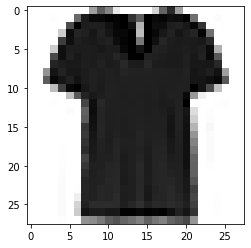

In [ ]:
plt.imshow(test_data_norm[random.randint(0, len(test_data_norm))], cmap=plt.cm.binary)

In [ ]:
weights, biases =model.layers[1].get_weights()

In [ ]:
biases

array([ 0.059956  ,  0.03853936, -0.02128455, -0.1276344 ,  0.13832064,
        0.48016667, -0.21346046, -0.14643767,  0.00738955,  0.22916664,
       -0.0228138 , -0.12307552,  0.31631127, -0.10036902, -0.35427806,
        0.00147322,  0.2142458 , -0.00260575, -0.05238962,  0.14793874,
       -0.10454243,  0.28095534, -0.17808563, -0.13107704,  0.01708709,
        0.00847147,  0.09669359, -0.01717851, -0.18487361,  0.2568229 ,
        0.1375667 ,  0.28066102,  0.1959489 , -0.09809482,  0.23279122,
       -0.5979761 ,  0.13392645, -0.04087219,  0.09454688,  0.26615646,
       -0.00091194,  0.16239402,  0.11657731,  0.06574268,  0.13458619,
       -0.04298677, -0.02815663,  0.10742294,  0.44168952, -0.00896546,
       -0.00231486,  0.15870762,  0.31413075,  0.00405995,  0.36247167,
       -0.81146723, -0.59969974, -0.06229882, -0.32716775,  0.06606991,
       -0.06094244,  0.24044158,  0.44616517,  0.04552738,  0.06923653,
       -0.00149948, -0.3717664 , -0.3356256 ,  0.2814304 , -0.00